In [1]:
from word_association import WordTable
from player import Liar, Player
import random
import json

In [11]:
order = range(4)
order

range(0, 4)

In [17]:
class Game():

    topics = ['food', 'animals', 'sports', 'jobs', 'weapons', 'nations']

    def __init__(self, topic='food', must_word=None, players=3, word_size=5):

        def get_list(topic):
            f = open(f'word_dictionary/{topic}_definitions.json', 'r')
            topic_dict = json.load(f)
            if must_word == None:
                topic_list = [sug for sug in topic_dict]
                random.shuffle(topic_list)
                self.answer = random.choice(topic_list[:word_size**2])
                return topic_list[:word_size**2]
            else:
                topic_list = [sug for sug in topic_dict if sug != must_word]
                random.shuffle(topic_list)
                topic_list.insert(int((word_size**2)/2), must_word)
                self.answer = must_word
                return topic_list[:word_size**2]

        self.topic = topic
        self.suggestions = get_list(topic)
        self.players = players
        self.computer = {}
    
    def role(self, computers=1):

        liar_num = random.randrange(self.players)
        order = [i for i in range(self.players)]
        random.shuffle(order)

        for i in range(self.players - computers):
            print("You are player number {}".format(order[i]))
            if order[i] == liar_num:
                print(f"Topic is {self.topic}. You are a liar.")
            else:
                print(f"Topic is {self.topic}. The answer is {self.answer}")
        
        for i in range(computers):
            print("Preparing computer...")
            play_num = self.players - computers + i
            if order[play_num] == liar_num:
                self.computer[order[play_num]] = \
                    Liar(topic=self.topic, suggestions=self.suggestions, players=self.players, play_num=play_num)
            else:
                self.computer[order[play_num]] = \
                    Player(topic=self.topic, suggestions=self.suggestions, answer=self.answer, players=self.players, play_num=play_num)


In [18]:
game = Game(topic= "animals", must_word='dog', players=4)

In [19]:
game.role()

You are player number 1
Topic is animals. The answer is dog
You are player number 0
Topic is animals. You are a liar.
You are player number 3
Topic is animals. The answer is dog
Preparing computer...


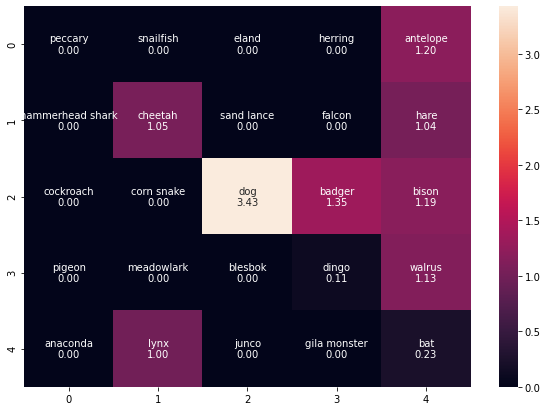

In [4]:
wordtable.resetScore()
wordtable.sentenceScore("It is a small animal.")
wordtable.sentenceScore("It is furry and cute.")
wordtable.sentenceScore("It is a pet.")
wordtable.plot()